<a href="https://colab.research.google.com/github/nhiduong611/MAT421/blob/main/Module_B_17_4_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lagrange Polynomial Interpolation

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-1-f07c949af95f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Find the Lagrange for the data set x = [0,1,2] and y = [1,3,2]

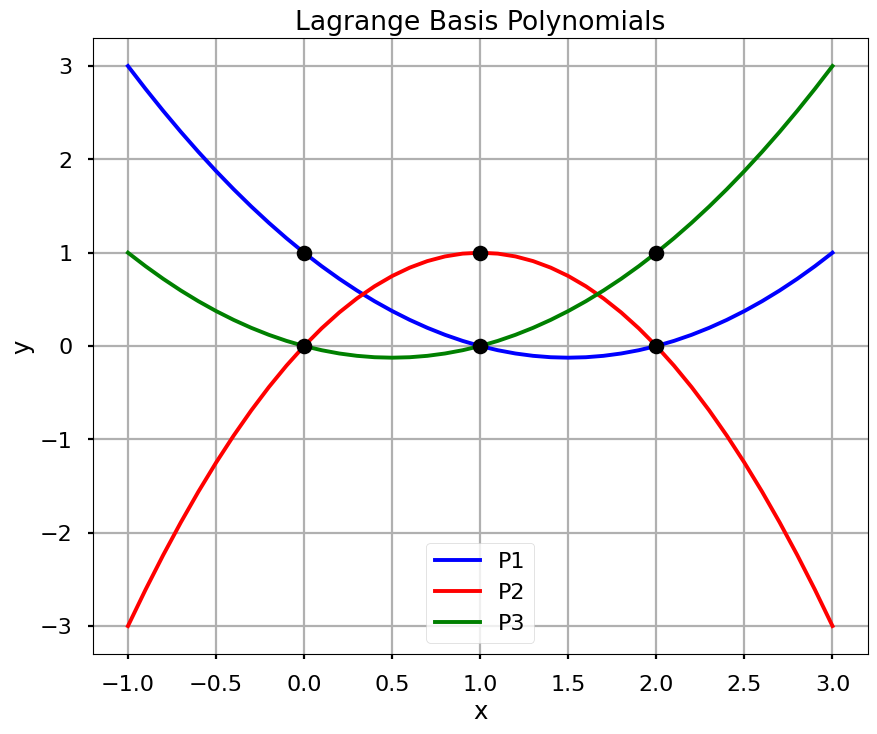

In [2]:
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]
# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)
x_new = np.arange(-1.0, 3.1, 0.1)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

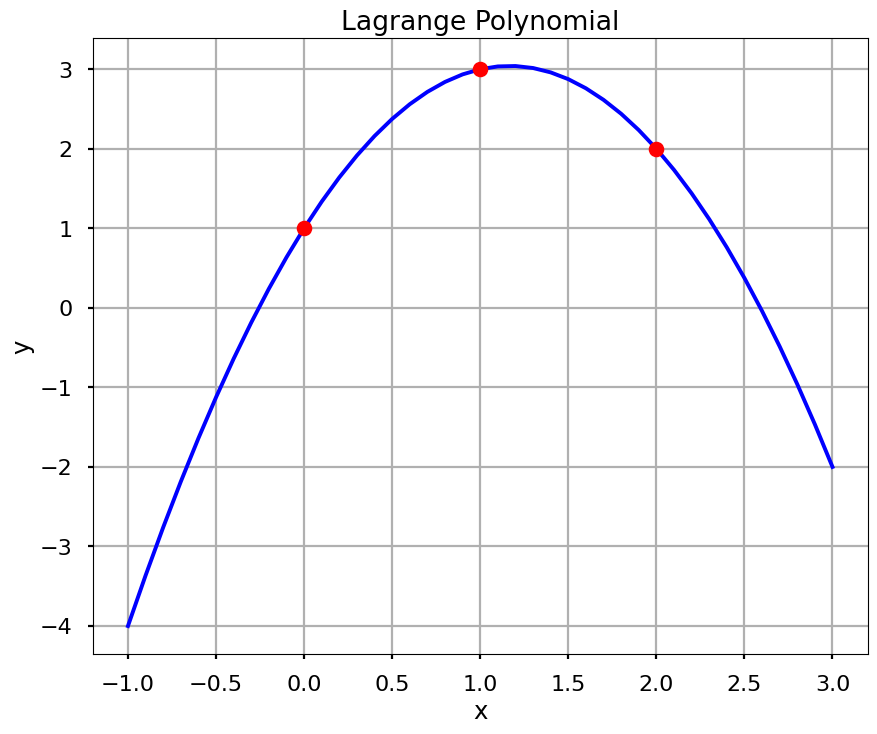

In [3]:
L = P1 + 3*P2 + 2*P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using lagrange from scipy

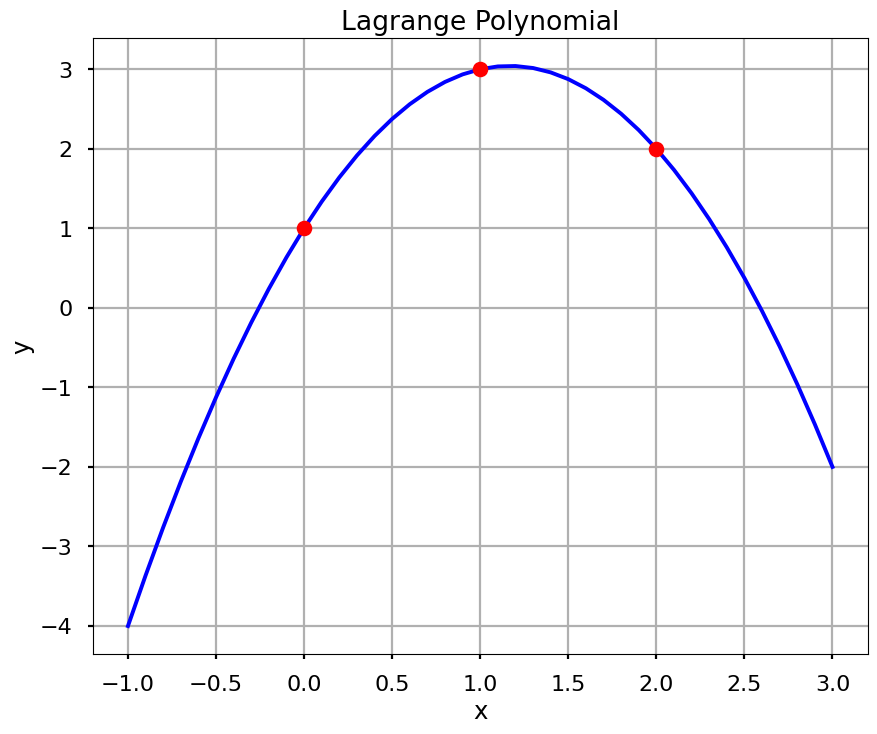

In [4]:
from scipy.interpolate import lagrange

f = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Newton's Polomial Interpolation

Calculate the divided differences table for x = [-5,-1,0,2] and y = [-2,6,1,3]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

<ipython-input-6-710ff8d2ab31>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


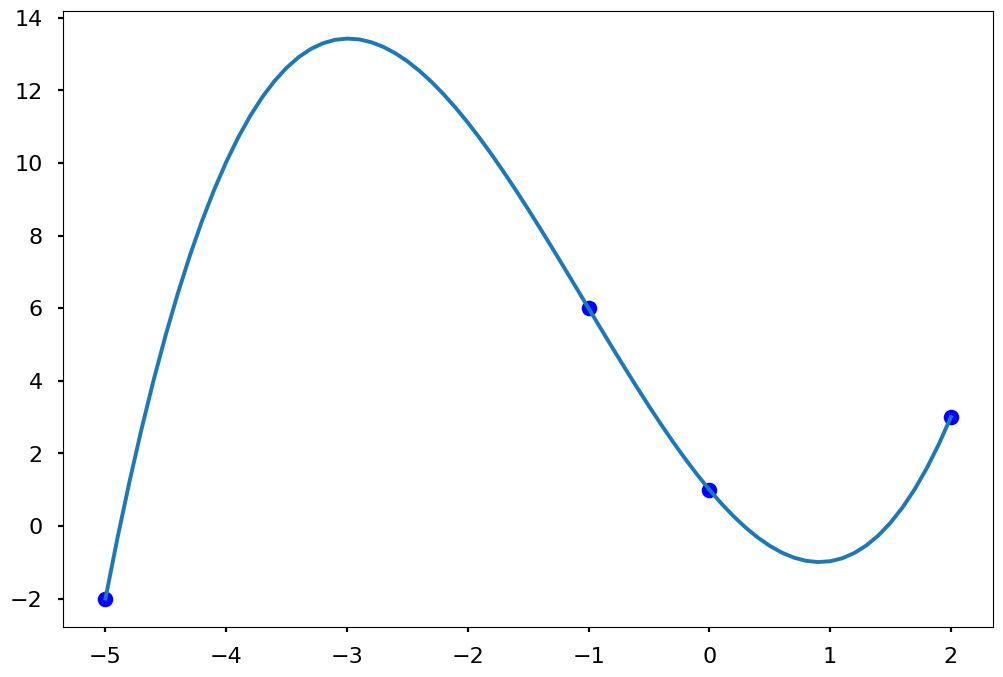

In [23]:
def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n, n])
# the first column is y
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]
# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)